In [102]:
#0. CASO 5: CARGAR LIBRERIAS
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
#1. CARGAR DE DATOS
df = pd.read_csv("caso5_marketing_conversion.csv")

In [104]:
df.head()

,duracion_video_seg,plataforma,segmento,likes,comentarios,conversion
0,46,Facebook,Adulto,524,91,0
1,90,Facebook,Senior,36,21,0
2,55,Facebook,Senior,588,198,0
3,77,Facebook,Senior,234,182,0
4,64,Facebook,Joven,970,161,0


In [105]:
df.describe()

,duracion_video_seg,likes,comentarios,conversion
count,220.000000,220.000000,220.000000,220.000000
mean,61.422727,472.377273,106.563636,0.204545
std,29.219504,277.239389,60.974510,0.404289
min,10.000000,5.000000,0.000000,0.000000
25%,39.000000,234.750000,51.000000,0.000000
50%,61.500000,467.000000,106.500000,0.000000
75%,88.000000,696.750000,164.250000,0.000000
max,115.000000,998.000000,199.000000,1.000000


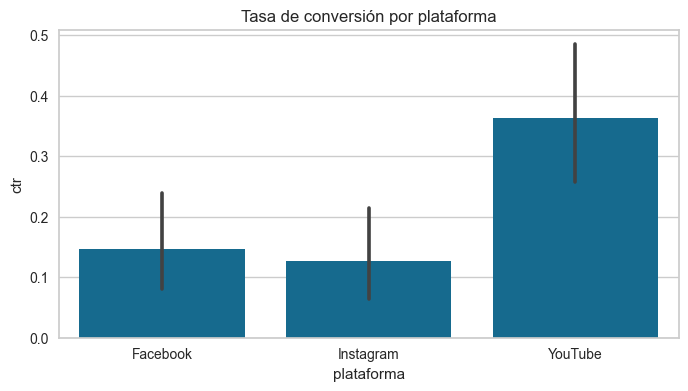

In [106]:
#2.ANALISIS EXPLORATORIO; CTR por plataforma
df['ctr']=df['conversion']
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='plataforma',y='ctr')
plt.title("Tasa de conversión por plataforma")
plt.show()

In [107]:
#3.FEATURE ENGINEERING: ENGAGEMENT COMBINADO
df['engagement'] = np.sqrt(df['likes']*0.7+df['comentarios']*1.5)

In [108]:
# Categorizar duración del video
df['duracion_categoria'] = pd.cut(
    df['duracion_video_seg'],
    bins=[0, 30, 60, 120],
    labels=['Corto', 'Medio', 'Largo']
)

In [109]:
# Crear variable combinada de canal y segmento
df['canal_segmento'] = df['plataforma'] + "_" + df['segmento']

In [111]:
#4.PYCARET: SETUP CON TÉNICAS AVANZADAS
clf = setup(
    data=df,
    target='conversion',
    session_id=2025,
    categorical_features=['plataforma', 'segmento', 'duracion_categoria', 'canal_segmento'],
    ignore_features=['ctr', 'duracion_video_seg'],
    normalize=True,
    feature_selection=True,
    remove_multicollinearity=True,
    transformation=True,
    transformation_method='yeo-johnson',
    verbose=False
)

In [112]:
#CREAR MODELO
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8021,0.5000,0.6667,0.5714,0.4545,0.4623
1,0.6250,0.7813,0.0000,0.0000,0.0000,-0.2000,-0.2182
2,0.8125,0.9231,0.6667,0.5000,0.5714,0.4545,0.4623
3,0.7500,0.7821,0.3333,0.3333,0.3333,0.1795,0.1795
4,0.9333,0.9444,1.0000,0.7500,0.8571,0.8148,0.8292
5,0.8667,0.9444,0.6667,0.6667,0.6667,0.5833,0.5833
6,0.7333,0.7083,0.3333,0.3333,0.3333,0.1667,0.1667
7,0.6667,0.4167,0.0000,0.0000,0.0000,-0.1905,-0.1961
8,0.6667,0.2917,0.0000,0.0000,0.0000,-0.1905,-0.1961


In [113]:
# 🔍 Interpretar con SHAP manualmente
X_train_transformed = get_config('X_train_transformed')
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_transformed)

In [114]:
# ✅ Ajustar dimensiones si hay columna extra (offset)
if shap_values[1].shape[1] == X_train_transformed.shape[1] + 1:
    shap_values_fixed = shap_values[1][:, :-1]
else:
    shap_values_fixed = shap_values[1]

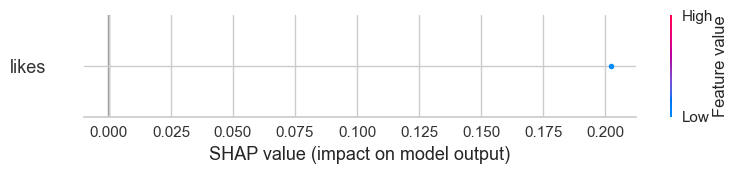

In [ ]:
# ✅ Alinear filas si hay desajuste
min_rows = min(shap_values_fixed.shape[0], X_train_transformed.shape[0])
shap.summary_plot(shap_values_fixed[:min_rows], X_train_transformed.iloc[:min_rows])

In [116]:
X_train_transformed = get_config('X_train_transformed')
print(X_train_transformed.columns.tolist())

['likes']
